<a href="https://colab.research.google.com/github/otwn/Data-Science-Review/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model


In [ ]:
oecd_bli = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/oecd_betterlifeindex40.csv",
                       thousands=",")

In [ ]:
print(len(oecd_bli))
oecd_bli.head()

40


,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,Educational attainment,Student skills,Years in education,Air pollution,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,..,20,..,32759,427064,5.4,73,1.31,49126,95,81,502,21,5,93,2.7,91,82.5,85,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21,1.6,33541,308325,3.5,72,1.84,50349,92,85,492,17,16,92,1.3,80,81.7,70,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21,2.2,30364,386006,3.7,63,3.54,49675,91,77,503,19.3,15,84,2,89,81.5,74,6.9,70.1,1.0,4.75,15.7
3,Canada,0.2,22,2.6,30854,423849,6,73,0.77,47622,93,91,523,17.3,7,91,2.9,68,81.9,88,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18,1.2,..,100967,8.7,63,..,25879,85,65,443,17.5,16,71,1.3,47,79.9,57,6.5,47.9,4.2,9.72,..


In [ ]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              40 non-null     object 
 1     Dwellings without basic facilities                 40 non-null     object 
 2     Housing expenditure                                40 non-null     object 
 3     Rooms per person                                   40 non-null     object 
 4     Household net adjusted disposable income           40 non-null     object 
 5     Household net wealth                               40 non-null     object 
 6     Labour market insecurity                           40 non-null     object 
 7     Employment rate                                    40 non-null     int64  
 8     Long-term unemployment rate                        40 non-null     obj

In [ ]:
gdp_capita = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/WEO_Data.csv", 
                         thousands=',', na_values="n/a")

In [ ]:
print(len(gdp_capita))
gdp_capita.head()

191


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [ ]:
gdp_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.6+ KB


In [ ]:
gdp_capita = gdp_capita[["Country", "2015"]]
gdp_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
gdp_capita.head()

,Country,GDP per capita
0,Afghanistan,599.994
1,Albania,3995.380
2,Algeria,4318.140
3,Angola,4100.320
4,Antigua and Barbuda,14414.300


In [ ]:
hp = lsi.join(gdp_capita.set_index('Country'), on='Country')

In [ ]:
hp.tail()

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,Educational attainment,Student skills,Years in education,Air pollution,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,GDP per capita
35,United Kingdom,0.3,26,1.9,28715,548392,4.5,75,1.13,43732,94,81,500,17.5,11,84,3.1,69,81.2,69,6.8,77.7,0.2,12.15,14.92,43770.69
36,United States,0.1,19,2.4,45284,632100,7.7,70,0.66,60558,91,91,488,17.2,10,83,3.1,65,78.6,88,6.9,73.9,5.5,11.09,14.44,55805.20
37,Brazil,6.7,..,..,..,..,..,61,..,..,90,49,395,16.2,10,73,2.2,79,74.8,..,6.4,35.6,26.7,7.13,..,8670.00
38,Russia,14.8,18,0.9,..,..,..,70,1.59,..,89,94,492,16.2,15,55,..,68,71.8,43,5.8,52.8,9.6,0.14,..,9054.91
39,South Africa,37,18,..,..,..,..,43,16.46,..,88,73,..,..,22,67,..,73,57.5,..,4.7,36.1,13.7,18.12,14.92,5694.57


In [ ]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              40 non-null     object 
 1     Dwellings without basic facilities                 40 non-null     object 
 2     Housing expenditure                                40 non-null     object 
 3     Rooms per person                                   40 non-null     object 
 4     Household net adjusted disposable income           40 non-null     object 
 5     Household net wealth                               40 non-null     object 
 6     Labour market insecurity                           40 non-null     object 
 7     Employment rate                                    40 non-null     int64  
 8     Long-term unemployment rate                        40 non-null     obj

In [ ]:
hp2 = hp[["Country", "GDP per capita", "  Life satisfaction"]].sort_values(by="  Life satisfaction",
                                                                     ascending=False)

In [ ]:
print(hp2)

            Country  GDP per capita    Life satisfaction
9           Finland        41973.99                  7.6
26           Norway        74822.11                  7.6
7           Denmark        52114.17                  7.6
14          Iceland        50854.58                  7.5
33      Switzerland        80675.31                  7.5
3            Canada        43331.96                  7.4
24      Netherlands        43603.12                  7.4
25      New Zealand        37044.89                  7.3
32           Sweden        49866.27                  7.3
0         Australia        50961.87                  7.3
16           Israel        35343.34                  7.2
1           Austria        43724.03                  7.1
15          Ireland        51350.74                  7.0
11          Germany        40996.51                  7.0
22       Luxembourg       101994.09                  6.9
36    United States        55805.20                  6.9
2           Belgium        4010

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

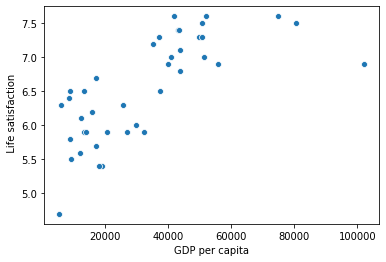

In [ ]:
sns.scatterplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

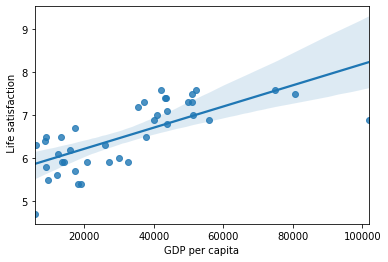

In [ ]:
sns.regplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

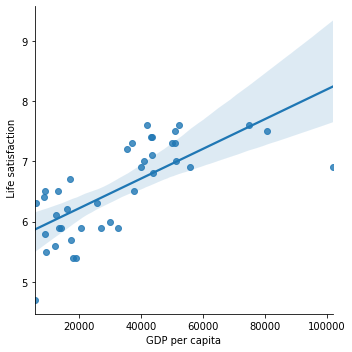

In [ ]:
sns.lmplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

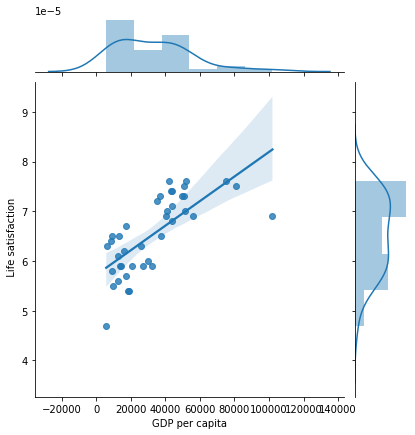

In [ ]:
sns.jointplot(data=hp2, x="GDP per capita", y="  Life satisfaction", kind="reg")

# Another Example with Random dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [11]:
def generate_examples(num=1000):
  W = [1.0, -3.0]
  b = np.random.randn()

  W = np.reshape(W, (2, 1))
  X = np.random.randn(num, 2)
  y = b + np.dot(X, W)  # (1000, 2).*(2,1)=(1000,1)
  y = np.reshape(y, (num, 1))

  return X, y

In [3]:
X, y = generate_examples()

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [5]:
print(X[0], y[0])

[-0.26409022  0.5698369 ] [-0.97360093]


## Initialize Parameters

The loss over m examples

$J = \frac{1}{2m} \sum(y - \hat{y})^{2}$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to min(J)

In [6]:
class Model:
  def __init__(self, num_features):
    self.num_features = num_features
    self.W = np.random.randn(num_features, 1)
    self.b = np.random.randn()

In [9]:
model = Model(3)
print(model.W)
print(model.b)

[[ 0.89299202]
 [ 1.30016056]
 [-0.09142546]]
0.31753738486715355


## Simple Algorith for gradient descent

The gradient descent algorithm can be simplified in 4 steps:


1.   Get predictions y_hat for X with current values of W and b
2.   Compute the loss between y and y_hat
3.   Find gradients of the loss with respect to parameters W and b
4.   Update the values of W and b by subtracting the gradient values obtained in the previous step


## Forward Pass

The gradients of loss with respect to w:

$$\frac{dJ}{dw} = \frac{\delta J}{\delta w} = \lim_{e \to 0}\frac{J(w + \epsilon) - J(w)}{\epsilon} $$

In [12]:
class Model(Model):
  def forward_pass(self, X):
    y_hat = self.b + np.dot(X, self.W)
    return y_hat

In [14]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-1.24998517]


## Compute Loss


In [15]:
class Model(Model):
  def compute_loss(self, y_hat, y_true):
    return np.sum(np.square(y_hat - y_true))/(2 * y_hat.shape[0])
    

In [17]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [18]:
loss

8.617943820008081

## Backward Pass

Find gradient
The gradient of loss with respect to bias can be calculated with:

$ \frac{dJ}{dW_{j}} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})x^{(i)}_{j} $

$ \frac{dJ}{db} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) $

In [19]:
class Model(Model):
  def backward_pass(self, X, y_true, y_hat):
    m = y_hat.shape[0]
    dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
    db = (1/m)*np.sum(y_hat - y_true)
    return dW, db

In [20]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [21]:
print(dW, db)

[-1.90715541  3.62825174] -0.10472857056990856


## Update Parameters

In [24]:
class Model(Model):
  def update_params(self, dW, db, lr):
    self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
    self.b = self.b - lr * db

## Training Loop

In [29]:
class Model(Model):
  def train(self, x_train, y_train, iterations, lr):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.compute_loss(y_hat, y_train)
      dW, db = self.backward_pass(x_train, y_train, y_hat)
      self.update_params(dW, db, lr)
      losses.append(loss)
      if i%int(iterations/10) == 0:
        print('Iter: {}, Loss: {:.4f}'.format(i, loss))
    return losses

In [30]:
model = Model(2)

In [31]:
x_train, y_train = generate_examples()

In [32]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 6.4100
Iter: 100, Loss: 3.6050
Iter: 200, Loss: 2.0281
Iter: 300, Loss: 1.1413
Iter: 400, Loss: 0.6425
Iter: 500, Loss: 0.3618
Iter: 600, Loss: 0.2038
Iter: 700, Loss: 0.1148
Iter: 800, Loss: 0.0647
Iter: 900, Loss: 0.0365


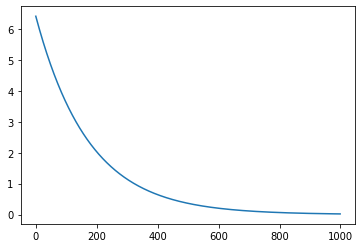

In [33]:
plt.plot(losses);

## Predictions

In [43]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [44]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

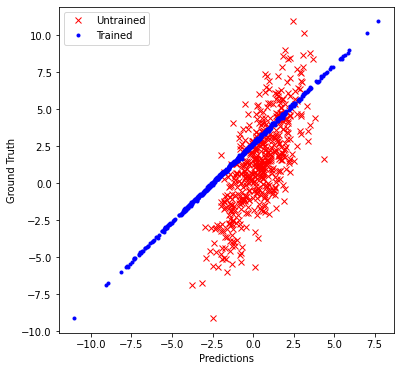

In [45]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b.', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

## Wrap up all

In [46]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
        
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y
    
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])
    
    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db
    
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db
        
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses
